In [1]:
# 配置参数和模型超参数
class CFG:
    valid_bs = 32 # 验证集batch_size，请根据GPU性能调整
    n_worker = 8 # 数据导入线程数，请根据CPU性能调整
    multi_gpu = True
    tta = True

    image_size = 512 # 图片尺寸
    model_arch = "tf_efficientnetv2_l_21k" # tf_efficientnetv2_l_21k  tf_efficientnet_b4  tf_efficientnetv2_m
    model_arch1 = "tf_efficientnetv2_m" # tf_efficientnetv2_l_21k  tf_efficientnet_b4  tf_efficientnetv2_m
    
    model_path = ["/kaggle/input/study-model-2/stage1_4749_fold0_tf_efficientnetv2_l_21k_512_best_9_5701.pth",
                  "/kaggle/input/study-model-2/stage1_1852_fold1_tf_efficientnetv2_l_21k_512_best_9_5724.pth",
                  "/kaggle/input/study-model/stage1_0218_fold2_tf_efficientnetv2_l_21k_512_best_7_6025.pth",
                  "/kaggle/input/study-model/stage1_0218_fold3_tf_efficientnetv2_l_21k_512_best_9_5855.pth",
                  "/kaggle/input/study-model/stage1_0218_fold4_tf_efficientnetv2_l_21k_512_best_9_5945.pth",
                 ]
    class_weight = [1,1,1,1,1,] ####

    class2_path = [
        "/kaggle/input/2class-pth/stage1_4632_fold0_tf_efficientnetv2_l_21k_512_best_9_9685.pth",
        "/kaggle/input/2class-pth/stage1_5812_fold1_tf_efficientnetv2_l_21k_512_best_5_9688.pth",
        "/kaggle/input/2class-pth/stage1_5812_fold2_tf_efficientnetv2_l_21k_512_best_7_9729.pth",
        "/kaggle/input/2class-pth/stage1_5812_fold3_tf_efficientnetv2_l_21k_512_best_8_9691.pth",
        "/kaggle/input/2class-pth/stage1_5812_fold4_tf_efficientnetv2_l_21k_512_best_9_9682.pth",
    ]

In [2]:
!conda install '/kaggle/input/pydicom-conda-helper/libjpeg-turbo-2.1.0-h7f98852_0.tar.bz2' -c conda-forge -y
!conda install '/kaggle/input/pydicom-conda-helper/libgcc-ng-9.3.0-h2828fa1_19.tar.bz2' -c conda-forge -y
!conda install '/kaggle/input/pydicom-conda-helper/gdcm-2.8.9-py37h500ead1_1.tar.bz2' -c conda-forge -y
!conda install '/kaggle/input/pydicom-conda-helper/conda-4.10.1-py37h89c1867_0.tar.bz2' -c conda-forge -y
!conda install '/kaggle/input/pydicom-conda-helper/certifi-2020.12.5-py37h89c1867_1.tar.bz2' -c conda-forge -y
!conda install '/kaggle/input/pydicom-conda-helper/openssl-1.1.1k-h7f98852_0.tar.bz2' -c conda-forge -y

!pip install /kaggle/input/kerasapplications -q
!pip install /kaggle/input/efficientnet-keras-source-code/ -q --no-deps


######################################################################## | 100% 
Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - \ done

######################################################################## | 100% 
Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - \ | done

######################################################################## | 100% 
Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - done

######################################################################## | 100% 
Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - \ | / - \ | / - \ | / - \ | / - \ done

######################################################################## | 100% 
Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - done

#############################

In [3]:
!pip install '/kaggle/input/effdet-latestvinbigdata-wbf-fused/ensemble_boxes-1.0.4-py3-none-any.whl' --no-deps

Processing /kaggle/input/effdet-latestvinbigdata-wbf-fused/ensemble_boxes-1.0.4-py3-none-any.whl


In [4]:
%load_ext autoreload
%autoreload 2

!pip install '/kaggle/input/effdet-latestvinbigdata-wbf-fused/ensemble_boxes-1.0.4-py3-none-any.whl' --no-deps

## MMDetection Offline Installation
!pip install '/kaggle/input/mmdetectionv2140/addict-2.4.0-py3-none-any.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/yapf-0.31.0-py2.py3-none-any.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/terminal-0.4.0-py3-none-any.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/terminaltables-3.1.0-py3-none-any.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/mmcv_full-1_3_8-cu110-torch1_7_0/mmcv_full-1.3.8-cp37-cp37m-manylinux1_x86_64.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/pycocotools-2.0.2/pycocotools-2.0.2' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/mmpycocotools-12.0.3/mmpycocotools-12.0.3' --no-deps

!cp -r /kaggle/input/mmdetectionv2140/mmdetection-2.14.0 /kaggle/working/
!mv /kaggle/working/mmdetection-2.14.0 /kaggle/working/mmdetection
%cd /kaggle/working/mmdetection
!pip install -e . --no-deps
%cd /kaggle/working/

import sys
sys.path.append('/kaggle/working/mmdetection')

Processing /kaggle/input/effdet-latestvinbigdata-wbf-fused/ensemble_boxes-1.0.4-py3-none-any.whl
ensemble-boxes is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Processing /kaggle/input/mmdetectionv2140/addict-2.4.0-py3-none-any.whl
Processing /kaggle/input/mmdetectionv2140/yapf-0.31.0-py2.py3-none-any.whl
Processing /kaggle/input/mmdetectionv2140/terminal-0.4.0-py3-none-any.whl
Processing /kaggle/input/mmdetectionv2140/terminaltables-3.1.0-py3-none-any.whl
terminaltables is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Processing /kaggle/input/mmdetectionv2140/mmcv_full-1_3_8-cu110-torch1_7_0/mmcv_full-1.3.8-cp37-cp37m-manylinux1_x86_64.whl
Processing /kaggle/input/mmdetectionv2140/pycocotools-2.0.2/pycocotools-2.0.2
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl size=272446 sha256=f315a2e75

In [5]:
import os

from PIL import Image
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
from numba import cuda
import gc
import torch
import sys
sys.path.append("/kaggle/input/timmeffnetv2")

import time
import cv2
import PIL.Image
import random
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
from torch.nn import Parameter
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import albumentations
import timm
import gc
from collections import OrderedDict
from warnings import filterwarnings
filterwarnings("ignore")
device = torch.device('cuda')


from glob import glob
import shutil, os
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
import seaborn as sns

In [6]:
# 设置随机种子，以便实验复现
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False # set True to be faster
seed_everything(42)

In [7]:
if pd.read_csv('/kaggle/input/siim-covid19-detection/sample_submission.csv').shape[0] == 2477:
    fast_sub = True
    fast_df = pd.DataFrame(([['00086460a852_study', 'negative 1 0 0 1 1'], 
                         ['000c9c05fd14_study', 'negative 1 0 0 1 1'], 
                         ['65761e66de9f_image', 'none 1 0 0 1 1'], 
                         ['51759b5579bc_image', 'none 1 0 0 1 1']]), 
                       columns=['id', 'PredictionString'])
else:
    fast_sub = False
    
# fast_sub = False

# .dcm to .png

In [8]:
def read_xray(path, voi_lut = True, fix_monochrome = True):
    # Original from: https://www.kaggle.com/raddar/convert-dicom-to-np-array-the-correct-way
    dicom = pydicom.read_file(path)

    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data

def resize(array, size, keep_ratio=False, resample=Image.LANCZOS):
    # Original from: https://www.kaggle.com/xhlulu/vinbigdata-process-and-resize-to-image
    im = Image.fromarray(array)
    
    if keep_ratio:
        im.thumbnail((size, size), resample)
    else:
        im = im.resize((size, size), resample)
    
    return im

In [9]:
split = 'test'
save_dir = f'/kaggle/tmp/{split}/'

os.makedirs(save_dir, exist_ok=True)

save_study_dir = f'/kaggle/tmp/{split}/study/'
os.makedirs(save_study_dir, exist_ok=True)
if fast_sub:
    xray = read_xray('/kaggle/input/siim-covid19-detection/train/00086460a852/9e8302230c91/65761e66de9f.dcm')
    im = resize(xray, size=512)  
    study = '00086460a852' + '_study.png'
    im.save(os.path.join(save_study_dir, study))
    xray = read_xray('/kaggle/input/siim-covid19-detection/train/000c9c05fd14/e555410bd2cd/51759b5579bc.dcm')
    im = resize(xray, size=512)  
    study = '000c9c05fd14' + '_study.png'
    im.save(os.path.join(save_study_dir, study))
else:   
    for dirname, _, filenames in tqdm(os.walk(f'/kaggle/input/siim-covid19-detection/{split}')):
        for file in filenames:
            # set keep_ratio=True to have original aspect ratio
            xray = read_xray(os.path.join(dirname, file))
            im = resize(xray, size=512)  
            study = dirname.split('/')[-2] + '_study.png'
            im.save(os.path.join(save_study_dir, study))

In [10]:
image_id = []
dim0 = []
dim1 = []
splits = []
save_dir = f'/kaggle/tmp/{split}/image/'
os.makedirs(save_dir, exist_ok=True)
if fast_sub:
    xray = read_xray('/kaggle/input/siim-covid19-detection/train/00086460a852/9e8302230c91/65761e66de9f.dcm')
    im = resize(xray, size=512)  
    im.save(os.path.join(save_dir,'65761e66de9f_image.png'))
    image_id.append('65761e66de9f.dcm'.replace('.dcm', ''))
    dim0.append(xray.shape[0])
    dim1.append(xray.shape[1])
    splits.append(split)
    
    xray = read_xray('/kaggle/input/siim-covid19-detection/train/000c9c05fd14/e555410bd2cd/51759b5579bc.dcm')
    im = resize(xray, size=512)  
    im.save(os.path.join(save_dir, '51759b5579bc_image.png'))
    image_id.append('51759b5579bc.dcm'.replace('.dcm', ''))
    dim0.append(xray.shape[0])
    dim1.append(xray.shape[1])
    splits.append(split)
else:
    for dirname, _, filenames in tqdm(os.walk(f'/kaggle/input/siim-covid19-detection/{split}')):
        for file in filenames:
            # set keep_ratio=True to have original aspect ratio
            xray = read_xray(os.path.join(dirname, file))
            im = resize(xray, size=512)  
            im.save(os.path.join(save_dir, file.replace('.dcm', '_image.png')))
            image_id.append(file.replace('.dcm', ''))
            dim0.append(xray.shape[0])
            dim1.append(xray.shape[1])
            splits.append(split)
            
meta = pd.DataFrame.from_dict({'image_id': image_id, 'dim0': dim0, 'dim1': dim1, 'split': splits})
meta = meta[meta['split'] == 'test']
meta['image_id'] = meta['image_id'] + '_image'
meta.columns = ['id', 'dim0', 'dim1', 'split']
meta

,id,dim0,dim1,split
0,65761e66de9f_image,2330,2783,test
1,51759b5579bc_image,3093,2850,test


In [11]:
meta.to_csv("/kaggle/working/meta.csv",index=False)

In [12]:
if fast_sub:
    all_sub_df = fast_df.copy()
else:
    all_sub_df = pd.read_csv('/kaggle/input/siim-covid19-detection/sample_submission.csv')
    
all_sub_df['id_last_str'] = all_sub_df["id"].str[-1]

study_len = all_sub_df[all_sub_df['id_last_str'] == 'y'].shape[0]
study_len

2

In [13]:
all_sub_df

,id,PredictionString,id_last_str
0,00086460a852_study,negative 1 0 0 1 1,y
1,000c9c05fd14_study,negative 1 0 0 1 1,y
2,65761e66de9f_image,none 1 0 0 1 1,e
3,51759b5579bc_image,none 1 0 0 1 1,e


# 2 Class Predict

In [14]:
if fast_sub:
    class2_sub_df = fast_df.copy()
else:
    class2_sub_df = pd.read_csv('/kaggle/input/siim-covid19-detection/sample_submission.csv')
    
    
class2_sub_df = class2_sub_df[study_len:]

class2_sub_df["file_path"] = save_dir + class2_sub_df["id"] + ".png"
label_cols = 'pred_2class'
class2_sub_df[label_cols] = 0
class2_sub_df

,id,PredictionString,file_path,pred_2class
2,65761e66de9f_image,none 1 0 0 1 1,/kaggle/tmp/test/image/65761e66de9f_image.png,0
3,51759b5579bc_image,none 1 0 0 1 1,/kaggle/tmp/test/image/51759b5579bc_image.png,0


In [15]:
# 对 train set 和 valid set 做数据增强
from albumentations import (
    HorizontalFlip, VerticalFlip, IAAPerspective, CLAHE, RandomRotate90,
    Transpose, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine, RandomResizedCrop,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose, Normalize, Cutout, CoarseDropout, ShiftScaleRotate, 
    CenterCrop, Resize, RandomCrop, GaussianBlur, JpegCompression, Downscale, ElasticTransform, ImageCompression
)
import albumentations
from albumentations.pytorch import ToTensorV2

transforms_test = Compose([
    Resize(CFG.image_size, CFG.image_size),
    Normalize()
])

In [16]:
# 定义数据集结构
class SIIMDataset(Dataset):
    def __init__(self, df, mode, transform=None):
        self.df = df.reset_index(drop=True)
        self.mode = mode # 数据集模式（train模式或test模式）
        self.transform = transform # 数据增强
        
    def __len__(self):
        return len(self.df) # 获取dataframe行数
    
    def __getitem__(self, index):
        row = self.df.loc[index] # 获取指定（index）行
        
        img = cv2.imread(row.file_path) # 用cv2读入图片数据
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2默认读入是BGR格式，现在转换成RGB格式
        
        # 如果有数据增强，则做数据增强
        if self.transform is not None: 
            img = self.transform(image=img)['image']
        
        # 调整一下数据格式
        img = img.transpose(2,0,1)
        img = img.astype(np.float32)
        # img = img/255 
        
        return torch.tensor(img).float() # 如果test模式，则只返回图片

In [17]:
class EfficientNetModel(nn.Module):
    def __init__(self, num_classes=1, model_arch=CFG.model_arch, pretrained=True):
        super(EfficientNetModel, self).__init__()
        e = timm.create_model(model_arch, pretrained=pretrained, drop_rate=0, drop_path_rate=0)
        
        self.logit = nn.Linear(e.classifier.in_features, num_classes)
        self.e1 = nn.Sequential(e.conv_stem, e.bn1, e.act1,)
        
        self.b0 = e.blocks[0]
        self.b1 = e.blocks[1]
        self.b2 = e.blocks[2]
        self.b3 = e.blocks[3]
        self.b4 = e.blocks[4] # channel = 224
        self.b5 = e.blocks[5]
        self.b6 = e.blocks[6]
        
        self.mask = nn.Sequential(
            nn.Conv2d(224, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 1, kernel_size=1, padding=0),
        )
        self.e2 = nn.Sequential(e.conv_head, e.bn2, e.act2,)

    def forward(self, x):
        batch_size = len(x)
        x = self.e1(x)
        x = self.b0(x)
        x = self.b1(x)
        x = self.b2(x)
        x = self.b3(x)
        x = self.b4(x)
        # ==========================
        mask = self.mask(x)
        # ==========================
        x = self.b5(x)
        x = self.b6(x)
        x = self.e2(x)
        x = F.adaptive_avg_pool2d(x,1).reshape(batch_size,-1)
        logit = self.logit(x)

        return logit, mask

In [18]:
models_list = []
def load_study_model():
    for one_model_pth in CFG.class2_path:
        if('v2_m' in one_model_pth):
            model = EfficientNetB7(pretrained=False)
        else:
            model = EfficientNetModel(pretrained=False)
        print(one_model_pth)
        state = torch.load(one_model_pth, map_location='cuda:0') 
        if 1:
            new_state_dict = OrderedDict()
            for k, v in state.items():
                k=k[7:]
                new_state_dict[k]=v
            model.load_state_dict(new_state_dict)
        else:
            model.load_state_dict(state)
        model.to(device);
        model.eval()
        models_list.append(model)

    print("multi_gpu: ", CFG.multi_gpu)
    print(len(models_list))
    
load_study_model()

/kaggle/input/2class-pth/stage1_4632_fold0_tf_efficientnetv2_l_21k_512_best_9_9685.pth
/kaggle/input/2class-pth/stage1_5812_fold1_tf_efficientnetv2_l_21k_512_best_5_9688.pth
/kaggle/input/2class-pth/stage1_5812_fold2_tf_efficientnetv2_l_21k_512_best_7_9729.pth
/kaggle/input/2class-pth/stage1_5812_fold3_tf_efficientnetv2_l_21k_512_best_8_9691.pth
/kaggle/input/2class-pth/stage1_5812_fold4_tf_efficientnetv2_l_21k_512_best_9_9682.pth
multi_gpu:  True
5


In [19]:
def test_func(models_list,test_loader):
    model.eval() # 模型调整到评估模式
    all_logits = []
    with torch.no_grad():
        for images in tqdm(test_loader): 
            avg_model_preds = []
            for model in models_list:
                images = images.to(device).float() 
                logits, mask = model(images)  
                avg_model_preds.append(logits)
            avg_model_preds = np.mean(avg_model_preds, axis=0)
        all_logits += [avg_model_preds.detach().cpu()] 
        all_logits = torch.cat(all_logits).cpu().numpy() 
        return all_logits

def test_func_tta(models_list, test_loader):
     # 模型调整到评估模式
    all_logits = []
    with torch.no_grad():
        for images in tqdm(test_loader): 
            images = images.to(device).float() 
            avg_model_preds = []
            for model in models_list:
                model.eval()
                logits1, mask1 = model(images)  
                logits2, mask2 = model(images.flip(-1))
                logits = (logits1.sigmoid().to('cpu').numpy() + logits2.sigmoid().to('cpu').numpy()) / 2
                avg_model_preds.append(logits)
            avg_model_preds = np.mean(avg_model_preds, axis=0)
            all_logits.append(avg_model_preds)
        all_logits = np.concatenate(all_logits)
        return all_logits

In [20]:
dataset_test = SIIMDataset(class2_sub_df, 'test', transform = transforms_test)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=CFG.valid_bs, shuffle=False, num_workers = CFG.n_worker, drop_last=False)

if CFG.tta:
    class2_sub_df[label_cols] = test_func_tta(models_list,test_loader)
else:
    class2_sub_df[label_cols] = test_func(models_list,test_loader)

  0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
class2_sub_df

,id,PredictionString,file_path,pred_2class
2,65761e66de9f_image,none 1 0 0 1 1,/kaggle/tmp/test/image/65761e66de9f_image.png,0.890850
3,51759b5579bc_image,none 1 0 0 1 1,/kaggle/tmp/test/image/51759b5579bc_image.png,0.645077


In [22]:
df_2class = class2_sub_df.merge(meta,how="left",on='id')
df_2class["none"] = 1-df_2class[label_cols]
df_2class["image_path"] = df_2class["file_path"]
df_2class

,id,PredictionString,file_path,pred_2class,dim0,dim1,split,none,image_path
0,65761e66de9f_image,none 1 0 0 1 1,/kaggle/tmp/test/image/65761e66de9f_image.png,0.890850,2330,2783,test,0.109150,/kaggle/tmp/test/image/65761e66de9f_image.png
1,51759b5579bc_image,none 1 0 0 1 1,/kaggle/tmp/test/image/51759b5579bc_image.png,0.645077,3093,2850,test,0.354923,/kaggle/tmp/test/image/51759b5579bc_image.png


In [23]:
del models_list
torch.cuda.empty_cache()
gc.collect()

60

# Yolov5 predict

In [24]:
yolov5_df = all_sub_df[study_len:].reset_index(drop=True) 
yolov5_df = pd.merge(yolov5_df, meta, on='id', how='left')
yolov5_df = yolov5_df.drop(['PredictionString'], axis=1)
yolov5_df

,id,id_last_str,dim0,dim1,split
0,65761e66de9f_image,e,2330,2783,test
1,51759b5579bc_image,e,3093,2850,test


In [25]:
dim = 512
test_dir = f'/kaggle/tmp/{split}/image'
shutil.copytree('/kaggle/input/d/kongbai97/yolov5-repo/yolov5-master', '/kaggle/working/yolov5')
os.chdir('/kaggle/working/yolov5')
import torch

In [26]:
weights_dir = '/kaggle/input/siim-cov19-yolov5l-train/yolov5/runs/train/exp/weights/best.pt'
!python detect.py --weights $weights_dir\
--img 672\
--augment\
--conf 0.001\
--iou 0.5\
--source $test_dir\
--name exp2\
--save-txt --save-conf --exist-ok

detect: weights=['/kaggle/input/siim-cov19-yolov5l-train/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/tmp/test/image, imgsz=672, conf_thres=0.001, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=exp2, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False
Results saved to runs/detect/exp2
2 labels saved to runs/detect/exp2/labels
Done. (0.366s)


In [27]:
weights_dir = '/kaggle/input/new-yolov5-weights/5fold/fold0.pt'
!python detect.py --weights $weights_dir\
--img 672\
--augment\
--conf 0.001\
--iou 0.5\
--source $test_dir\
--name expf0\
--save-txt --save-conf --exist-ok

detect: weights=['/kaggle/input/new-yolov5-weights/5fold/fold0.pt'], source=/kaggle/tmp/test/image, imgsz=672, conf_thres=0.001, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=expf0, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False
Results saved to runs/detect/expf0
2 labels saved to runs/detect/expf0/labels
Done. (0.420s)


In [28]:
weights_dir = '/kaggle/input/new-yolov5-weights/5fold/fold1.pt'
import torch
!python detect.py --weights $weights_dir\
--img 672\
--augment\
--conf 0.001\
--iou 0.5\
--source $test_dir\
--name expf1\
--save-txt --save-conf --exist-ok

detect: weights=['/kaggle/input/new-yolov5-weights/5fold/fold1.pt'], source=/kaggle/tmp/test/image, imgsz=672, conf_thres=0.001, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=expf1, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False
Results saved to runs/detect/expf1
2 labels saved to runs/detect/expf1/labels
Done. (0.406s)


In [29]:
weights_dir = '/kaggle/input/new-yolov5-weights/5fold/fold2.pt'
import torch
!python detect.py --weights $weights_dir\
--img 672\
--augment\
--conf 0.001\
--iou 0.5\
--source $test_dir\
--name expf2\
--save-txt --save-conf --exist-ok

detect: weights=['/kaggle/input/new-yolov5-weights/5fold/fold2.pt'], source=/kaggle/tmp/test/image, imgsz=672, conf_thres=0.001, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=expf2, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False
Results saved to runs/detect/expf2
2 labels saved to runs/detect/expf2/labels
Done. (0.440s)


In [30]:
weights_dir = '/kaggle/input/new-yolov5-weights/5fold/fold3.pt'
import torch
!python detect.py --weights $weights_dir\
--img 672\
--augment\
--conf 0.001\
--iou 0.5\
--source $test_dir\
--name expf3\
--save-txt --save-conf --exist-ok

detect: weights=['/kaggle/input/new-yolov5-weights/5fold/fold3.pt'], source=/kaggle/tmp/test/image, imgsz=672, conf_thres=0.001, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=expf3, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False
Results saved to runs/detect/expf3
2 labels saved to runs/detect/expf3/labels
Done. (0.459s)


In [31]:
weights_dir = '/kaggle/input/new-yolov5-weights/5fold/fold4.pt'
import torch
!python detect.py --weights $weights_dir\
--img 672\
--augment\
--conf 0.001\
--iou 0.5\
--source $test_dir\
--name expf4\
--save-txt --save-conf --exist-ok

detect: weights=['/kaggle/input/new-yolov5-weights/5fold/fold4.pt'], source=/kaggle/tmp/test/image, imgsz=672, conf_thres=0.001, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=expf4, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False
Results saved to runs/detect/expf4
2 labels saved to runs/detect/expf4/labels
Done. (0.427s)


In [32]:
def yolo2voc(bboxes):
    """
    yolo => [xmid, ymid, w, h] (normalized)
    voc  => [x1, y1, x2, y1]

    """ 
    bboxes = bboxes.copy().astype(float) # otherwise all value will be 0 as voc_pascal dtype is np.int

    bboxes[..., [0, 1]] = bboxes[..., [0, 1]] - bboxes[..., [2, 3]]/2
    bboxes[..., [2, 3]] = bboxes[..., [0, 1]] + bboxes[..., [2, 3]]
    
    return bboxes

def yolo2voc1(image_height, image_width, bboxes):
    bboxes = bboxes.copy().astype(float) # otherwise all value will be 0 as voc_pascal dtype is np.int

    bboxes[..., [0, 2]] = bboxes[..., [0, 2]]* image_width
    bboxes[..., [1, 3]] = bboxes[..., [1, 3]]* image_height
    
    return bboxes

In [33]:
from ensemble_boxes import weighted_boxes_fusion
image_ids = []
PredictionStrings = []

for i in range(len(yolov5_df)):
    boxes_list = []
    scores_list = []
    labels_list = []
    is_exist1 = True
    is_exist2 = True
    
    iou_thr = 0.5
    skip_box_thr = 0.0001
    image_id = yolov5_df.loc[i,'id']
    w, h = yolov5_df.loc[yolov5_df.id==image_id,['dim1', 'dim0']].values[0]
    
    boxes_list = []
    scores_list = []
    labels_list = []
    weights = [1, 1, 1, 1, 1]
    file_pathf0 = '/kaggle/working/yolov5/runs/detect/expf0/labels/{}.txt'.format(image_id)
    if os.path.exists(file_pathf0):
        f = open(file_pathf0, 'r')
        data = np.array(f.read().replace('\n', ' ').strip().split(' ')).astype(np.float32).reshape(-1, 6)
        data = data[:, [0, 5, 1, 2, 3, 4]]
        data[:,2:] = yolo2voc(data[:, 2:])
        boxes_list.append(data[:,2:].tolist())
        scores_list.append(data[:,1].tolist())
        labels_list.append(data[:,0].tolist())
        
    file_pathf1 = '/kaggle/working/yolov5/runs/detect/expf1/labels/{}.txt'.format(image_id)
    if os.path.exists(file_pathf1):
        f = open(file_pathf1, 'r')
        data = np.array(f.read().replace('\n', ' ').strip().split(' ')).astype(np.float32).reshape(-1, 6)
        data = data[:, [0, 5, 1, 2, 3, 4]]
        data[:,2:] = yolo2voc(data[:, 2:])
        boxes_list.append(data[:,2:].tolist())
        scores_list.append(data[:,1].tolist())
        labels_list.append(data[:,0].tolist())
        
    file_pathf2 = '/kaggle/working/yolov5/runs/detect/expf2/labels/{}.txt'.format(image_id)
    if os.path.exists(file_pathf2):
        f = open(file_pathf2, 'r')
        data = np.array(f.read().replace('\n', ' ').strip().split(' ')).astype(np.float32).reshape(-1, 6)
        data = data[:, [0, 5, 1, 2, 3, 4]]
        data[:,2:] = yolo2voc(data[:, 2:])
        boxes_list.append(data[:,2:].tolist())
        scores_list.append(data[:,1].tolist())
        labels_list.append(data[:,0].tolist())
        
    file_pathf3 = '/kaggle/working/yolov5/runs/detect/expf3/labels/{}.txt'.format(image_id)
    if os.path.exists(file_pathf3):
        f = open(file_pathf3, 'r')
        data = np.array(f.read().replace('\n', ' ').strip().split(' ')).astype(np.float32).reshape(-1, 6)
        data = data[:, [0, 5, 1, 2, 3, 4]]
        data[:,2:] = yolo2voc(data[:, 2:])
        boxes_list.append(data[:,2:].tolist())
        scores_list.append(data[:,1].tolist())
        labels_list.append(data[:,0].tolist())
        
    file_pathf4 = '/kaggle/working/yolov5/runs/detect/expf4/labels/{}.txt'.format(image_id)
    if os.path.exists(file_pathf4):
        f = open(file_pathf4, 'r')
        data = np.array(f.read().replace('\n', ' ').strip().split(' ')).astype(np.float32).reshape(-1, 6)
        data = data[:, [0, 5, 1, 2, 3, 4]]
        data[:,2:] = yolo2voc(data[:, 2:])
        boxes_list.append(data[:,2:].tolist())
        scores_list.append(data[:,1].tolist())
        labels_list.append(data[:,0].tolist())
        
    
    if len(boxes_list)>1:
        if len(boxes_list)==2:
            weights = [1, 1]
        elif len(boxes_list)==3:
            weights = [1, 1, 1]
        elif len(boxes_list)==4:
            weights = [1, 1, 1, 1]
        else:
            weights = [1, 1, 2, 1, 1] ####
        print("weights:",weights)
        boxes, scores, labels = weighted_boxes_fusion(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, skip_box_thr=skip_box_thr)
        data1 = np.zeros((boxes.shape[0],6))
        data1[:,0] = labels
        data1[:,1] = scores
        data1[:,2:] = boxes
    elif len(boxes_list)==1:
        data1 = data
    else:
        is_exist1 = False
        
    file_path = '/kaggle/working/yolov5/runs/detect/exp2/labels/{}.txt'.format(image_id)
    if os.path.exists(file_path):
        f = open(file_path, 'r')
        data = np.array(f.read().replace('\n', ' ').strip().split(' ')).astype(np.float32).reshape(-1, 6)
        data = data[:, [0, 5, 1, 2, 3, 4]]
        data[:,2:] = yolo2voc(data[:, 2:])
            
    boxes_list = []
    scores_list = []
    labels_list = []
    weights = [1, 6]
    if os.path.exists(file_path) and is_exist1:
        boxes_list.append(data[:,2:].tolist())
        scores_list.append(data[:,1].tolist())
        labels_list.append(data[:,0].tolist())
        boxes_list.append(data1[:,2:].tolist())
        scores_list.append(data1[:,1].tolist())
        labels_list.append(data1[:,0].tolist())
        boxes, scores, labels = weighted_boxes_fusion(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, skip_box_thr=skip_box_thr)
        data2 = np.zeros((boxes.shape[0],6))
        data2[:,0] = labels
        data2[:,1] = scores
        data2[:,2:] = boxes
    elif os.path.exists(file_path) or is_exist1:
        data2 = data
    else:
        is_exist2 = False
        
    if is_exist1==False and is_exist2==False:
        continue
            
    bboxes = list(np.round(np.concatenate((data2[:, :2], np.round(yolo2voc1(h, w, data2[:, 2:]))), axis =1).reshape(-1), 12).astype(str))
    for idx in range(len(bboxes)):
        bboxes[idx] = str(int(float(bboxes[idx]))) if idx%6!=1 else bboxes[idx]
    image_ids.append(image_id)
    PredictionStrings.append(' '.join(bboxes))

image_sub_2_df = pd.DataFrame({'id':image_ids,
                        'PredictionString':PredictionStrings})

weights: [1, 1, 2, 1, 1]
weights: [1, 1, 2, 1, 1]


In [34]:
image_sub_2_df

,id,PredictionString
0,65761e66de9f_image,0 0.185589805245 669 751 1261 1441 0 0.1627866...
1,51759b5579bc_image,0 0.110834948719 1900 1235 2565 2095 0 0.08008...


In [35]:
yolov5_df = pd.merge(yolov5_df, image_sub_2_df, on = 'id', how = 'left').fillna("none 1 0 0 1 1")
yolov5_df = yolov5_df[['id', 'PredictionString']]
yolov5_df

,id,PredictionString
0,65761e66de9f_image,0 0.185589805245 669 751 1261 1441 0 0.1627866...
1,51759b5579bc_image,0 0.110834948719 1900 1235 2565 2095 0 0.08008...


In [36]:
for i in range(yolov5_df.shape[0]):
    if yolov5_df.loc[i,'PredictionString'] == "none 1 0 0 1 1":
        continue
    sub_df_split = yolov5_df.loc[i,'PredictionString'].split()
    sub_df_list = []
    for j in range(int(len(sub_df_split) / 6)):
        sub_df_list.append('opacity')
        sub_df_list.append(sub_df_split[6 * j + 1])
        sub_df_list.append(sub_df_split[6 * j + 2])
        sub_df_list.append(sub_df_split[6 * j + 3])
        sub_df_list.append(sub_df_split[6 * j + 4])
        sub_df_list.append(sub_df_split[6 * j + 5])
    yolov5_df.loc[i,'PredictionString'] = ' '.join(sub_df_list)

yolov5_df['none'] = df_2class['none'] 
for i in range(yolov5_df.shape[0]):
    if yolov5_df.loc[i,'PredictionString'] != 'none 1 0 0 1 1':
        yolov5_df.loc[i,'PredictionString'] = yolov5_df.loc[i,'PredictionString'] + ' none ' + str(yolov5_df.loc[i,'none']) + ' 0 0 1 1'

yolov5_df = yolov5_df[['id', 'PredictionString']] 
yolov5_df

,id,PredictionString
0,65761e66de9f_image,opacity 0.185589805245 669 751 1261 1441 opaci...
1,51759b5579bc_image,opacity 0.110834948719 1900 1235 2565 2095 opa...


In [37]:
image_all_df = yolov5_df

# YOLOV5 2

# MMDET

In [38]:
from tqdm.notebook import tqdm

import torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device.type)

import torchvision
print(torch.__version__, torch.cuda.is_available())

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

# Check MMDetection installation
from mmdet.apis import set_random_seed

# Imports
import mmdet
from mmdet.apis import set_random_seed
from mmdet.datasets import build_dataset
from mmdet.models import build_detector

import mmcv
from mmcv import Config
from mmcv.runner import load_checkpoint
from mmcv.parallel import MMDataParallel
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
from mmdet.apis import single_gpu_test
from mmdet.datasets import build_dataloader, build_dataset

cuda
1.7.0 True
11.0
GCC 7.3


In [39]:
import cv2
import matplotlib.pyplot as plt

label2color = [[59, 238, 119]]
IMAGE_DIMS = (512, 512)

viz_labels =  ["Covid_Abnormality"]

def plot_img(img, size=(18, 18), is_rgb=True, title="", cmap=None):
    plt.figure(figsize=size)
    plt.imshow(img, cmap=cmap)
    plt.suptitle(title)
    plt.show()
    
def plot_imgs(imgs, cols=2, size=10, is_rgb=True, title="", cmap=None, img_size=None):
    rows = len(imgs)//cols + 1
    fig = plt.figure(figsize=(cols*size, rows*size))
    for i, img in enumerate(imgs):
        if img_size is not None:
            img = cv2.resize(img, img_size)
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(img, cmap=cmap)
    plt.suptitle(title)
    return fig
    
def draw_bbox(image, box, label, color):   
    alpha = 0.1
    alpha_font = 0.6
    thickness = 8
    font_size = 2.0
    font_weight = 1
    overlay_bbox = image.copy()
    overlay_text = image.copy()
    output = image.copy()

    text_width, text_height = cv2.getTextSize(label.upper(), cv2.FONT_HERSHEY_SIMPLEX, font_size, font_weight)[0]
    cv2.rectangle(overlay_bbox, (box[0], box[1]), (box[2], box[3]),
                color, -1)
    cv2.addWeighted(overlay_bbox, alpha, output, 1 - alpha, 0, output)
    cv2.rectangle(overlay_text, (box[0], box[1]-18-text_height), (box[0]+text_width+8, box[1]),
                (0, 0, 0), -1)
    cv2.addWeighted(overlay_text, alpha_font, output, 1 - alpha_font, 0, output)
    cv2.rectangle(output, (box[0], box[1]), (box[2], box[3]),
                    color, thickness)
    cv2.putText(output, label.upper(), (box[0], box[1]-12),
            cv2.FONT_HERSHEY_SIMPLEX, font_size, (255, 255, 255), font_weight, cv2.LINE_AA)
    return output

def draw_bbox_small(image, box, label, color):   
    alpha = 0.1
    alpha_text = 0.3
    thickness = 1
    font_size = 0.4
    overlay_bbox = image.copy()
    overlay_text = image.copy()
    output = image.copy()

    text_width, text_height = cv2.getTextSize(label.upper(), cv2.FONT_HERSHEY_SIMPLEX, font_size, thickness)[0]
    cv2.rectangle(overlay_bbox, (box[0], box[1]), (box[2], box[3]),
                color, -1)
    cv2.addWeighted(overlay_bbox, alpha, output, 1 - alpha, 0, output)
    cv2.rectangle(overlay_text, (box[0], box[1]-7-text_height), (box[0]+text_width+2, box[1]),
                (0, 0, 0), -1)
    cv2.addWeighted(overlay_text, alpha_text, output, 1 - alpha_text, 0, output)
    cv2.rectangle(output, (box[0], box[1]), (box[2], box[3]),
                    color, thickness)
    cv2.putText(output, label.upper(), (box[0], box[1]-5),
            cv2.FONT_HERSHEY_SIMPLEX, font_size, (255, 255, 255), thickness, cv2.LINE_AA)
    return output

In [40]:
baseline_cfg_path = "/kaggle/input/siim-mmdetection-cascadercnn-weight-bias/job4_cascade_rcnn_x101_32x4d_fpn_1x_fold0/job4_cascade_rcnn_x101_32x4d_fpn_1x_coco.py"
cfg = Config.fromfile(baseline_cfg_path)

cfg.classes = ("Covid_Abnormality")
cfg.data.test.img_prefix = ''
cfg.data.test.classes = cfg.classes

# cfg.model.roi_head.bbox_head.num_classes = 1
# cfg.model.bbox_head.num_classes = 1
for head in cfg.model.roi_head.bbox_head:
    head.num_classes = 1

# Set seed thus the results are more reproducible
cfg.seed = 211
set_random_seed(211, deterministic=False)
cfg.gpu_ids = [0]

cfg.data.test.pipeline=[
            dict(type='LoadImageFromFile'),
            dict(
                type='MultiScaleFlipAug',
                img_scale=(1333, 800),
                flip=False,
                transforms=[
                    dict(type='Resize', keep_ratio=True),
                    dict(type='RandomFlip', direction='horizontal'),
                    dict(
                        type='Normalize',
                        mean=[123.675, 116.28, 103.53],
                        std=[58.395, 57.12, 57.375],
                        to_rgb=True),
                    dict(type='Pad', size_divisor=32),
                    dict(type='DefaultFormatBundle'),
                    dict(type='Collect', keys=['img'])
                ])
        ]

cfg.test_pipeline = [
            dict(type='LoadImageFromFile'),
            dict(
                type='MultiScaleFlipAug',
                img_scale=(1333, 800),
                flip=False,
                transforms=[
                    dict(type='Resize', keep_ratio=True),
                    dict(type='RandomFlip', direction='horizontal'),
                    dict(
                        type='Normalize',
                        mean=[123.675, 116.28, 103.53],
                        std=[58.395, 57.12, 57.375],
                        to_rgb=True),
                    dict(type='Pad', size_divisor=32),
                    dict(type='DefaultFormatBundle'),
                    dict(type='Collect', keys=['img'])
                ])
        ]


cfg.model.test_cfg.rcnn.score_thr = 0.001

WEIGHTS_FILE = '/kaggle/input/siim-mmdetection-cascadercnn-weight-bias/job4_cascade_rcnn_x101_32x4d_fpn_1x_fold0/epoch_10.pth'
options = dict(classes = ("Covid_Abnormality"))
model = init_detector(cfg, WEIGHTS_FILE, device='cuda:0')

Use load_from_local loader


/kaggle/working/mmdetection/mmdet/apis/inference.py:47: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/2 [00:00<?, ?it/s]

/kaggle/working/mmdetection/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/kaggle/working/mmdetection/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


,id,PredictionString
1,51759b5579bc_image,opacity 0.7418073415756226 145 1851 998 2550 o...
0,65761e66de9f_image,opacity 0.8058207631111145 1821 813 2418 1529 ...


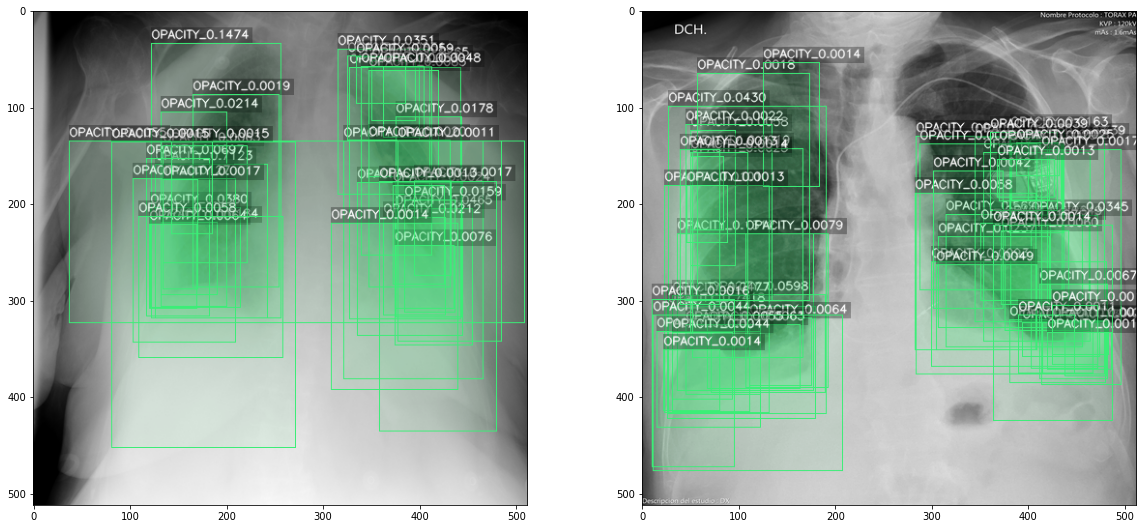

In [41]:
viz_images = []
results = []
score_threshold = cfg.model.test_cfg.rcnn.score_thr

def format_pred(boxes: np.ndarray, scores: np.ndarray, labels: np.ndarray) -> str:
    pred_strings = []
    label_str = ['opacity']
    for label, score, bbox in zip(labels, scores, boxes):
        xmin, ymin, xmax, ymax = bbox.astype(np.int64)
        pred_strings.append(f"{label_str[int(label)]} {score:.16f} {xmin} {ymin} {xmax} {ymax}")
    return " ".join(pred_strings)

model.to(device)
model.eval()

viz_images = []

with torch.no_grad():
    for index, row in tqdm(df_2class.iterrows(), total=df_2class.shape[0]):
        original_H, original_W = (int(row.dim0), int(row.dim1))
        predictions = inference_detector(model, row.image_path)
        boxes, scores, labels = (list(), list(), list())

        for k, cls_result in enumerate(predictions):
#             print("cls_result", cls_result)
            if cls_result.size != 0:
                if len(labels)==0:
                    boxes = np.array(cls_result[:, :4])
                    scores = np.array(cls_result[:, 4])
                    labels = np.array([k]*len(cls_result[:, 4]))
                else:    
                    boxes = np.concatenate((boxes, np.array(cls_result[:, :4])))
                    scores = np.concatenate((scores, np.array(cls_result[:, 4])))
                    labels = np.concatenate((labels, [k]*len(cls_result[:, 4])))
                    
            if fast_sub:
                img_viz = cv2.imread(row.image_path)
                for box, label, score in zip(boxes, labels, scores):
                    color = label2color[int(label)]
                    img_viz = draw_bbox_small(img_viz, box.astype(np.int32), f'opacity_{score:.4f}', color)
                viz_images.append(img_viz)

        indexes = np.where(scores > score_threshold)
#         print(indexes)
        boxes = boxes[indexes]
        scores = scores[indexes]
        labels = labels[indexes]

        if len(labels) != 0:
            h_ratio = original_H/IMAGE_DIMS[0]
            w_ratio = original_W/IMAGE_DIMS[1]
            boxes[:, [0, 2]] *= w_ratio
            boxes[:, [1, 3]] *= h_ratio

            result = {
                "id": row.id,
                "PredictionString": format_pred(
                    boxes, scores, labels
                ),
            }

            results.append(result)
del model
gc.collect()

mmdet_df = pd.DataFrame(results, columns=['id', 'PredictionString'])

if fast_sub:
    display(mmdet_df.sample(2))
    # Plot sample images
    plot_imgs(viz_images, cmap=None)
    plt.savefig('viz_fig_siim.png', bbox_inches='tight')
    plt.show()

In [42]:
mmdet_df = mmdet_df.merge(df_2class[['id', 'none']], on='id', how='left')

for i in range(mmdet_df.shape[0]):
    if mmdet_df.loc[i,'PredictionString'] != 'none 1 0 0 1 1':
        mmdet_df.loc[i,'PredictionString'] = mmdet_df.loc[i,'PredictionString'] + ' none ' + str(mmdet_df.loc[i,'none']) + ' 0 0 1 1'
mmdet_df = mmdet_df[['id', 'PredictionString']]

mmdet_df

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,PredictionString
0,65761e66de9f_image,opacity 0.8058207631111145 1821 813 2418 1529 ...
1,51759b5579bc_image,opacity 0.7418073415756226 145 1851 998 2550 o...


In [43]:
mmdet_df.to_csv("/kaggle/working/mmdet_df.csv",index=False)
!rm -r /kaggle/working/mmdetection

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Study_Level Predict

In [44]:
if fast_sub:
    study_sub_df = fast_df.copy()
else:
    study_sub_df = pd.read_csv('/kaggle/input/siim-covid19-detection/sample_submission.csv')
    
    
study_sub_df = study_sub_df[:study_len]

study_sub_df["file_path"] = save_study_dir + study_sub_df["id"] + ".png"
study_sub_df['negative'] = 0
study_sub_df['typical'] = 0
study_sub_df['indeterminate'] = 0
study_sub_df['atypical'] = 0

label_cols = study_sub_df.columns[3:]
label_cols

Index(['negative', 'typical', 'indeterminate', 'atypical'], dtype='object')

In [45]:
# 对 train set 和 valid set 做数据增强
from albumentations import (
    HorizontalFlip, VerticalFlip, IAAPerspective, CLAHE, RandomRotate90,
    Transpose, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine, RandomResizedCrop,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose, Normalize, Cutout, CoarseDropout, ShiftScaleRotate, 
    CenterCrop, Resize, RandomCrop, GaussianBlur, JpegCompression, Downscale, ElasticTransform, ImageCompression
)
import albumentations
from albumentations.pytorch import ToTensorV2

transforms_test = Compose([
    Resize(CFG.image_size, CFG.image_size),
    Normalize()
])

In [46]:
# 定义数据集结构
class SIIMDataset(Dataset):
    def __init__(self, df, mode, transform=None):
        self.df = df.reset_index(drop=True)
        self.mode = mode # 数据集模式（train模式或test模式）
        self.transform = transform # 数据增强
        
    def __len__(self):
        return len(self.df) # 获取dataframe行数
    
    def __getitem__(self, index):
        row = self.df.loc[index] # 获取指定（index）行
        
        img = cv2.imread(row.file_path) # 用cv2读入图片数据
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2默认读入是BGR格式，现在转换成RGB格式
        
        # 如果有数据增强，则做数据增强
        if self.transform is not None: 
            img = self.transform(image=img)['image']
        
        # 调整一下数据格式
        img = img.transpose(2,0,1)
        img = img.astype(np.float32)
        # img = img/255 
        
        # 返回 获取到的图片
        if self.mode == 'test':
            return torch.tensor(img).float() # 如果test模式，则只返回图片
        else:
            return torch.tensor(img).float(), torch.tensor(row[:4]).float() # 如果其他模式，则返回 图片 和 其所属类别标签

In [47]:
class EfficientNetModel(nn.Module):
    def __init__(self, num_classes=4, model_arch=CFG.model_arch, pretrained=True):
        super(EfficientNetModel, self).__init__()
        e = timm.create_model(model_arch, pretrained=pretrained, drop_rate=0, drop_path_rate=0)
        
        self.logit = nn.Linear(e.classifier.in_features, num_classes)
        self.e1 = nn.Sequential(e.conv_stem, e.bn1, e.act1,)
        
        self.b0 = e.blocks[0]
        self.b1 = e.blocks[1]
        self.b2 = e.blocks[2]
        self.b3 = e.blocks[3]
        self.b4 = e.blocks[4] # channel = 224
        self.b5 = e.blocks[5]
        self.b6 = e.blocks[6]
        
        self.mask = nn.Sequential(
            nn.Conv2d(224, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 1, kernel_size=1, padding=0),
        )
        self.e2 = nn.Sequential(e.conv_head, e.bn2, e.act2,)

    def forward(self, x):
        batch_size = len(x)
        x = self.e1(x)
        x = self.b0(x)
        x = self.b1(x)
        x = self.b2(x)
        x = self.b3(x)
        x = self.b4(x)
        # ==========================
        mask = self.mask(x)
        # ==========================
        x = self.b5(x)
        x = self.b6(x)
        x = self.e2(x)
        x = F.adaptive_avg_pool2d(x,1).reshape(batch_size,-1)
        logit = self.logit(x)

        return logit, mask
    
    
class EfficientNetB7(nn.Module):
    def __init__(self, model_name='tf_efficientnet_b7_ns',pretrained=False):
        super().__init__()        
        e = timm.create_model(model_name, pretrained=False)
#         print(e)
        self.logit = nn.Linear(e.classifier.in_features, 4)
        self.e1 = nn.Sequential(e.conv_stem, e.bn1, e.act1,)
        
        self.b0 = e.blocks[0]
        self.b1 = e.blocks[1]
        self.b2 = e.blocks[2]
        self.b3 = e.blocks[3]
        self.b4 = e.blocks[4] # channel = 224
        self.b5 = e.blocks[5]
        self.b6 = e.blocks[6]
        
        self.mask = nn.Sequential(
            nn.Conv2d(224, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 1, kernel_size=1, padding=0),
        )
        
        self.e2 = nn.Sequential(e.conv_head, e.bn2, e.act2,)
    def forward(self, x):
        batch_size = len(x)
        x = self.e1(x)
        x = self.b0(x)
        x = self.b1(x)
        x = self.b2(x)
        x = self.b3(x)
        x = self.b4(x)
        # ==========================
        mask = self.mask(x)
        # ==========================
        x = self.b5(x)
        x = self.b6(x)
        x = self.e2(x)
        x = F.adaptive_avg_pool2d(x,1).reshape(batch_size,-1)
        logit = self.logit(x)
#         print(mask.size())
#         print(logit.size())
        return logit, mask

In [48]:
models_list = []
def load_study_model():
    for one_model_pth in CFG.model_path:
        if('v2_m' in one_model_pth):
            model = EfficientNetB7(pretrained=False)
        else:
            model = EfficientNetModel(pretrained=False)
        print(one_model_pth)
        state = torch.load(one_model_pth, map_location='cuda:0') 
        if 1:
            new_state_dict = OrderedDict()
            for k, v in state.items():
                k=k[7:]
                new_state_dict[k]=v
            model.load_state_dict(new_state_dict)
        else:
            model.load_state_dict(state)
        model.to(device);
        model.eval()
        models_list.append(model)

    print("multi_gpu: ", CFG.multi_gpu)
    print(len(models_list))
    
load_study_model()

/kaggle/input/study-model-2/stage1_4749_fold0_tf_efficientnetv2_l_21k_512_best_9_5701.pth
/kaggle/input/study-model-2/stage1_1852_fold1_tf_efficientnetv2_l_21k_512_best_9_5724.pth
/kaggle/input/study-model/stage1_0218_fold2_tf_efficientnetv2_l_21k_512_best_7_6025.pth
/kaggle/input/study-model/stage1_0218_fold3_tf_efficientnetv2_l_21k_512_best_9_5855.pth
/kaggle/input/study-model/stage1_0218_fold4_tf_efficientnetv2_l_21k_512_best_9_5945.pth
/kaggle/input/simeffb7/stage1_1852_fold0_tf_efficientnetv2_m_512_best_5_5800.pth
/kaggle/input/simeffb7/stage1_1852_fold1_tf_efficientnetv2_m_512_best_6_5684.pth
/kaggle/input/simeffb7/stage1_1852_fold2_tf_efficientnetv2_m_512_best_6_6087.pth
/kaggle/input/simeffb7/stage1_1852_fold3_tf_efficientnetv2_m_512_best_5_5798.pth
/kaggle/input/simeffb7/stage1_1852_fold4_tf_efficientnetv2_m_512_best_3_5965.pth
multi_gpu:  True
10


In [49]:
def test_func(models_list,test_loader):
    model.eval() # 模型调整到评估模式
    all_logits = []
    with torch.no_grad():
        for images in tqdm(test_loader): 
            avg_model_preds = []
            for model in models_list:
                images = images.to(device).float() 
                logits, mask = model(images)  
                avg_model_preds.append(logits)
            avg_model_preds = np.mean(avg_model_preds, axis=0)
        all_logits += [avg_model_preds.detach().cpu()] 
        all_logits = torch.cat(all_logits).cpu().numpy() 
        return all_logits

def test_func_tta(models_list, test_loader):
     # 模型调整到评估模式
    all_logits = []
    with torch.no_grad():
        for images in tqdm(test_loader): 
            images = images.to(device).float() 
            avg_model_preds = []
            for model in models_list:
                model.eval()
                logits1, mask1 = model(images)  
                logits2, mask2 = model(images.flip(-1))
                logits = (logits1.sigmoid().to('cpu').numpy() + logits2.sigmoid().to('cpu').numpy()) / 2
                avg_model_preds.append(logits)
            avg_model_preds = np.average(avg_model_preds, axis=0, weights=CFG.class_weight) ####
            all_logits.append(avg_model_preds)
        all_logits = np.concatenate(all_logits)
        return all_logits

In [50]:
dataset_test = SIIMDataset(study_sub_df, 'test', transform = transforms_test)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=CFG.valid_bs, shuffle=False, num_workers = CFG.n_worker, drop_last=False)

if CFG.tta:
    study_sub_df[label_cols] = test_func_tta(models_list,test_loader)
else:
    study_sub_df[label_cols] = test_func(models_list,test_loader)
    
    
study_sub_df = study_sub_df.drop("file_path",axis=1)
study_sub_df.columns = ['id', 'PredictionString1', 'negative', 'typical', 'indeterminate', 'atypical']
all_sub_df = pd.merge(all_sub_df, study_sub_df, on = 'id', how = 'left')
all_sub_df

  0%|          | 0/1 [00:00<?, ?it/s]

,id,PredictionString,id_last_str,PredictionString1,negative,typical,indeterminate,atypical
0,00086460a852_study,negative 1 0 0 1 1,y,negative 1 0 0 1 1,0.082841,0.378069,0.203301,0.335101
1,000c9c05fd14_study,negative 1 0 0 1 1,y,negative 1 0 0 1 1,0.043461,0.065455,0.068631,0.862181
2,65761e66de9f_image,none 1 0 0 1 1,e,NaN,NaN,NaN,NaN,NaN
3,51759b5579bc_image,none 1 0 0 1 1,e,NaN,NaN,NaN,NaN,NaN


In [51]:
for i in range(study_len):
    negative = all_sub_df.loc[i,'negative']
    typical = all_sub_df.loc[i,'typical']
    indeterminate = all_sub_df.loc[i,'indeterminate']
    atypical = all_sub_df.loc[i,'atypical']
    all_sub_df.loc[i, 'PredictionString'] = f'negative {negative} 0 0 1 1 typical {typical} 0 0 1 1 indeterminate {indeterminate} 0 0 1 1 atypical {atypical} 0 0 1 1'
    
study_sub_df = all_sub_df[['id', 'PredictionString']][:study_len]
study_sub_df

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,PredictionString
0,00086460a852_study,negative 0.08284110790118575 0 0 1 1 typical 0...
1,000c9c05fd14_study,negative 0.04346077236259589 0 0 1 1 typical 0...


In [52]:
del models_list
torch.cuda.empty_cache()
gc.collect()

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


40

# Merge study and image

In [53]:
image_all_df = meta.merge(yolov5_df,on="id").merge(mmdet_df,on="id")
image_all_df

,id,dim0,dim1,split,PredictionString_x,PredictionString_y
0,65761e66de9f_image,2330,2783,test,opacity 0.185589805245 669 751 1261 1441 opaci...,opacity 0.8058207631111145 1821 813 2418 1529 ...
1,51759b5579bc_image,3093,2850,test,opacity 0.110834948719 1900 1235 2565 2095 opa...,opacity 0.7418073415756226 145 1851 998 2550 o...


In [54]:
from ensemble_boxes import *

weights = [3, 1]
iou_thr = 0.6
skip_box_thr = 0.0001
image_output_list = []

for index, id_, dim0, dim1, split, yolo5_boxes, mmdet_boxes in image_all_df.itertuples():
    yolo5_boxes_list = yolo5_boxes.split(" "); mmdet_boxes_list = mmdet_boxes.split(" ")
    assert len(yolo5_boxes_list) % 6 == 0;    assert len(mmdet_boxes_list) % 6 == 0
    none_list = yolo5_boxes_list[-6:]
    yolo5_boxes_list = yolo5_boxes_list[:-6];  mmdet_boxes_list = mmdet_boxes_list[:-6]
    boxes_list = [[],[]]
    scores_list = [[],[]]
    for i in range(len(yolo5_boxes_list)):
        if i % 6 == 1:
            scores_list[0].append(float(yolo5_boxes_list[i]))
        if i % 6 == 2:
            boxes_list[0].append([float(yolo5_boxes_list[i])/dim1,
                                  float(yolo5_boxes_list[i+1])/dim0,
                                  float(yolo5_boxes_list[i+2])/dim1,
                                  float(yolo5_boxes_list[i+3])/dim0])
            
    for i in range(len(mmdet_boxes_list)):
        if i % 6 == 1:
            scores_list[1].append(float(mmdet_boxes_list[i]))
        if i % 6 == 2:
            boxes_list[1].append([float(mmdet_boxes_list[i])/dim1,
                                  float(mmdet_boxes_list[i+1])/dim0,
                                  float(mmdet_boxes_list[i+2])/dim1,
                                  float(mmdet_boxes_list[i+3])/dim0]) 
            
    labels_list = [[0]*len(scores_list[0]), [0]*len(scores_list[1])]        
    boxes, scores, labels = weighted_boxes_fusion(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, skip_box_thr=skip_box_thr)
    
    output_str = ""
    for box, score in zip(boxes, scores): 
        output_str += "opacity "
        output_str += f"{score} "
        for b_i in range(4):
            if b_i in [0,2]:
                output_str += f"{int(round(box[b_i]*dim1,0))} "
            elif b_i in [1,3]:
                output_str += f"{int(round(box[b_i]*dim0,0))} "

    output_str += " ".join(none_list)
    image_output_list.append(output_str)

    
image_all_df["PredictionString"] = image_output_list
image_all_df = image_all_df[["id", "PredictionString"]]
image_all_df

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,PredictionString
0,65761e66de9f_image,opacity 0.3235451877117157 1825 827 2414 1518 ...
1,51759b5579bc_image,opacity 0.2455153912305832 163 1824 1004 2527 ...


In [55]:
study_sub_df = study_sub_df.append(image_all_df).reset_index(drop=True)
study_sub_df.to_csv('/kaggle/working/submission.csv',index = False)
study_sub_df

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,PredictionString
0,00086460a852_study,negative 0.08284110790118575 0 0 1 1 typical 0...
1,000c9c05fd14_study,negative 0.04346077236259589 0 0 1 1 typical 0...
2,65761e66de9f_image,opacity 0.3235451877117157 1825 827 2414 1518 ...
3,51759b5579bc_image,opacity 0.2455153912305832 163 1824 1004 2527 ...


In [56]:
shutil.rmtree('/kaggle/working/yolov5')

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
